### Diamonds dataset exploration

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, make_scorer 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

Column Description
- id: only for test & sample submission files, id for prediction sample identification
- price: price in USD
- carat: weight of the diamond
- cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color: diamond colour
- clarity: a measurement of how clear the diamond is
- x: length in mm
- y: width in mm
- z: depth in mm
- depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
- table: width of top of diamond relative to widest point (43--95)

In [2]:
!kaggle competitions download -c diamonds-datamad1020-rev

diamonds-datamad1020-rev.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
!tar -xzvf diamonds-datamad1020-rev.zip

x sample_submission.csv
x test.csv
x train.csv


In [4]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission.head()

,id,price
0,0,6.033588
1,1,6.880996
2,2,8.871935
3,3,7.250187
4,4,5.855043


In [5]:
test_data = pd.read_csv('test.csv')
test_data.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74
1,1,0.41,Ideal,E,VS2,61.8,54.0,4.79,4.76,2.95
2,2,0.91,Very Good,E,SI2,62.5,59.0,6.16,6.23,3.87
3,3,0.42,Very Good,G,VS2,62.6,57.0,4.76,4.80,2.99
4,4,0.54,Ideal,G,IF,61.5,56.0,5.28,5.25,3.24


In [6]:
train_data = pd.read_csv('train.csv')
train_data.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.53,Very Good,G,SI1,63.4,54.0,5.09,5.13,3.24,7.057
1,1,0.41,Ideal,D,SI1,63.0,56.0,4.80,4.75,3.01,6.824
2,2,0.32,Ideal,I,VS2,61.6,56.0,4.37,4.39,2.70,6.107
3,3,0.31,Ideal,H,VVS2,61.2,56.0,4.34,4.37,2.66,6.390
4,4,1.35,Premium,J,VS2,60.5,56.0,7.19,7.12,4.33,8.741


In [7]:
test_data.shape

(13485, 10)

In [8]:
train_data.shape

(40455, 11)

In [9]:
test_data.describe()

,id,carat,depth,table,x,y,z
count,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000
mean,6742.000000,0.806748,61.742455,57.475336,5.750646,5.755216,3.549901
std,3892.928525,0.480789,1.423544,2.246018,1.127986,1.142190,0.699999
min,0.000000,0.200000,52.300000,49.000000,0.000000,0.000000,0.000000
25%,3371.000000,0.400000,61.000000,56.000000,4.720000,4.730000,2.910000
50%,6742.000000,0.710000,61.800000,57.000000,5.710000,5.730000,3.530000
75%,10113.000000,1.050000,62.500000,59.000000,6.560000,6.550000,4.040000
max,13484.000000,5.010000,79.000000,95.000000,10.740000,31.800000,6.980000


In [10]:
train_data.describe()

,id,carat,depth,table,x,y,z,price
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,20227.000000,0.795004,61.751722,57.451133,5.724661,5.727629,3.535011,7.781266
std,11678.496907,0.471700,1.435644,2.230630,1.119617,1.142047,0.707558,1.014051
min,0.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,5.787000
25%,10113.500000,0.400000,61.100000,56.000000,4.710000,4.720000,2.910000,6.851000
50%,20227.000000,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,7.781000
75%,30340.500000,1.040000,62.500000,59.000000,6.530000,6.530000,4.030000,8.575000
max,40454.000000,4.500000,79.000000,79.000000,10.230000,58.900000,31.800000,9.843000


In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       40455 non-null  int64  
 1   carat    40455 non-null  float64
 2   cut      40455 non-null  object 
 3   color    40455 non-null  object 
 4   clarity  40455 non-null  object 
 5   depth    40455 non-null  float64
 6   table    40455 non-null  float64
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
 10  price    40455 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 3.4+ MB


In [12]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13485 entries, 0 to 13484
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       13485 non-null  int64  
 1   carat    13485 non-null  float64
 2   cut      13485 non-null  object 
 3   color    13485 non-null  object 
 4   clarity  13485 non-null  object 
 5   depth    13485 non-null  float64
 6   table    13485 non-null  float64
 7   x        13485 non-null  float64
 8   y        13485 non-null  float64
 9   z        13485 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 1.0+ MB


In [13]:
#Observed that the minimum value of x (length), y(width) & z(depth) is zero - since this does not make any sense, those will be dropped
#train_data = train_data.loc[(train_data[['x','y','z']]!=0).all(axis=1)]
#test_data = test_data.loc[(test_data[['x','y','z']]!=0).all(axis=1)]

In [14]:
#Confirming that there won't be any zero values rows
train_data.describe()
test_data.describe()

,id,carat,depth,table,x,y,z
count,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000
mean,6742.000000,0.806748,61.742455,57.475336,5.750646,5.755216,3.549901
std,3892.928525,0.480789,1.423544,2.246018,1.127986,1.142190,0.699999
min,0.000000,0.200000,52.300000,49.000000,0.000000,0.000000,0.000000
25%,3371.000000,0.400000,61.000000,56.000000,4.720000,4.730000,2.910000
50%,6742.000000,0.710000,61.800000,57.000000,5.710000,5.730000,3.530000
75%,10113.000000,1.050000,62.500000,59.000000,6.560000,6.550000,4.040000
max,13484.000000,5.010000,79.000000,95.000000,10.740000,31.800000,6.980000


In [15]:
#Let's take a look at the correlation
train_data.corr()

,id,carat,depth,table,x,y,z,price
id,1.000000,-0.006186,-0.002316,-0.010840,-0.005675,-0.004038,-0.005649,-0.004040
carat,-0.006186,1.000000,0.025261,0.182888,0.974744,0.950639,0.948895,0.920846
depth,-0.002316,0.025261,1.000000,-0.298380,-0.028188,-0.032829,0.091738,-0.000533
table,-0.010840,0.182888,-0.298380,1.000000,0.197226,0.185480,0.150606,0.159950
x,-0.005675,0.974744,-0.028188,0.197226,1.000000,0.973473,0.966374,0.957934
y,-0.004038,0.950639,-0.032829,0.185480,0.973473,1.000000,0.946517,0.934832
z,-0.005649,0.948895,0.091738,0.150606,0.966374,0.946517,1.000000,0.931147
price,-0.004040,0.920846,-0.000533,0.159950,0.957934,0.934832,0.931147,1.000000


In [16]:
test_data.corr()

,id,carat,depth,table,x,y,z
id,1.000000,-0.002581,0.009404,0.003284,-0.004933,-0.002390,-0.004134
carat,-0.002581,1.000000,0.037156,0.177766,0.976156,0.955018,0.967058
depth,0.009404,0.037156,1.000000,-0.287953,-0.016478,-0.018677,0.104789
table,0.003284,0.177766,-0.287953,1.000000,0.189640,0.178492,0.151778
x,-0.004933,0.976156,-0.016478,0.189640,1.000000,0.978368,0.984122
y,-0.002390,0.955018,-0.018677,0.178492,0.978368,1.000000,0.968676
z,-0.004134,0.967058,0.104789,0.151778,0.984122,0.968676,1.000000


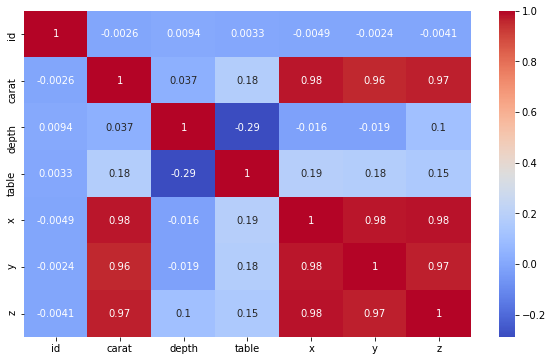

In [17]:
#Let's visualize correlation between diamond features through a heatmap
plt.figure(figsize = (10,6))
sns.heatmap(test_data.corr(),annot = True , cmap = 'coolwarm' );

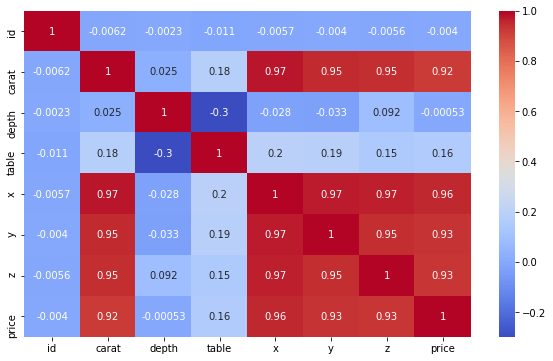

In [18]:
plt.figure(figsize = (10,6))
sns.heatmap(train_data.corr(),annot = True , cmap = 'coolwarm' );

In [19]:
#Let's check for collinearity issues
#Created a code to evaluate the collinearity between columns
corr_matrix = train_data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
to_drop

['x', 'y', 'z', 'price']

In [20]:
train_data.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.53,Very Good,G,SI1,63.4,54.0,5.09,5.13,3.24,7.057
1,1,0.41,Ideal,D,SI1,63.0,56.0,4.80,4.75,3.01,6.824
2,2,0.32,Ideal,I,VS2,61.6,56.0,4.37,4.39,2.70,6.107
3,3,0.31,Ideal,H,VVS2,61.2,56.0,4.34,4.37,2.66,6.390
4,4,1.35,Premium,J,VS2,60.5,56.0,7.19,7.12,4.33,8.741


There is very apparent collinearity here. x,z, and z are all correlated with each other (and should either be combined, or one should be used to model the price). There is also a very strong relationship between carat and x, y, and z. 

In [21]:
#Let's drop x, y, z columns. 
train_data.drop(['x','y','z'], axis = 1, inplace = True)
test_data.drop(['x','y','z'], axis = 1, inplace = True)

In [22]:
#Now, we will analyze numerical and categorical data - train data
numerical_cols = train_data.select_dtypes(include=np.number).columns.to_list()
categorical_cols = train_data.select_dtypes(exclude=np.number).columns.to_list()

In [23]:
#Now, we will analyze numerical and categorical data - test data
numerical_cols = test_data.select_dtypes(include=np.number).columns.to_list()
categorical_cols = test_data.select_dtypes(exclude=np.number).columns.to_list()

In [24]:
train_data['cut'].value_counts()
test_data['cut'].value_counts()

Ideal        5397
Premium      3422
Very Good    3028
Good         1243
Fair          395
Name: cut, dtype: int64

In [25]:
len(test_data)

13485

In [26]:
len(train_data)

40455

### Label encoding

In [27]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 

train_data['cut'] = label_encoder.fit_transform(train_data['cut'])
train_data['color'] = label_encoder.fit_transform(train_data['color'])
train_data['clarity'] = label_encoder.fit_transform(train_data['clarity'])
train_data.head()

,id,carat,cut,color,clarity,depth,table,price
0,0,0.53,4,3,2,63.4,54.0,7.057
1,1,0.41,2,0,2,63.0,56.0,6.824
2,2,0.32,2,5,5,61.6,56.0,6.107
3,3,0.31,2,4,7,61.2,56.0,6.390
4,4,1.35,3,6,5,60.5,56.0,8.741


In [28]:
test_data['cut'] = label_encoder.fit_transform(test_data['cut'])
test_data['color'] = label_encoder.fit_transform(test_data['color'])
test_data['clarity'] = label_encoder.fit_transform(test_data['clarity'])
test_data.head()

,id,carat,cut,color,clarity,depth,table
0,0,0.33,2,4,1,61.9,55.0
1,1,0.41,2,1,5,61.8,54.0
2,2,0.91,4,1,3,62.5,59.0
3,3,0.42,4,3,5,62.6,57.0
4,4,0.54,2,3,1,61.5,56.0


## Modeling, Prediction, and Evaluation

In [29]:
X = train_data.drop(['price'],1)
y = train_data['price']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Linear Regression

In [31]:
lr = LinearRegression()
model = lr.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MSE: {}".format(mean_squared_error((y_test),(y_pred))))
print("R2  : {}".format(np.sqrt(r2_score((y_test),(y_pred)))))

MSE: 0.1340056913187721
R2  : 0.9330045978333286


### Random Forest

We use random forest regression to test a non-linear model on the data

In [32]:
rr  = RandomForestRegressor()
rr.fit(X_train,y_train)
y_pred = rr.predict(X_test)

In [33]:
print("MSE: {}".format(mean_squared_error((y_test),(y_pred))))
print("R2  : {}".format(np.sqrt(r2_score((y_test),(y_pred)))))

MSE: 0.011447619798722917
R2  : 0.9944531554015679


In [34]:
prediction1 = rr.predict(test_data)

In [35]:
len(prediction1)

13485

In [36]:
RF_df = pd.DataFrame(prediction1, columns = ['price'])

In [37]:
RF_df['id'] = RF_df.index

In [38]:
RF_df = RF_df[['id', 'price']]

In [39]:
RF_df.to_csv(r'RF_df.csv', index=False)

### Grid Search CV

- []

I will now use grid search in order to find the best parameters. 

In [40]:
param_grid = {
'n_estimators': [200,400,800,1000],
 'min_samples_split': [2,3,4],
 'min_samples_leaf': [2,3,4],
 'max_depth': [70, 80, 90, 100],
'warm_start': [False]}

In [41]:
MSE = make_scorer(mean_squared_error)

In [42]:
grid_search = GridSearchCV(estimator = rr, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 1, scoring=MSE)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 41.9min


In [ ]:
print(grid_search.best_params_)